<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
import numpy as np
!pip install pytest

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Инициализируем результирующий вектор нулями
    result = np.zeros((X[0].shape[0], 1))  # (n, 1)

    # Проходим по всем матрицам и векторам
    for matrix, vector in zip(X, V):
        result += matrix @ vector  # Суммируем произведения

    return result

import unittest

class TestSumProd(unittest.TestCase):
    
    def test_basic_case(self):
        X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        expected_result = np.array([[1 + 2 + 5 + 6], [3 + 4 + 7 + 8]])
        np.testing.assert_array_equal(sum_prod(X, V), expected_result)

    def test_single_matrix_vector(self):
        X = [np.array([[1, 2], [3, 4]])]
        V = [np.array([[1], [1]])]
        expected_result = np.array([[1 + 2], [3 + 4]])
        np.testing.assert_array_equal(sum_prod(X, V), expected_result)

    def test_zero_matrix_vector(self):
        X = [np.zeros((2, 2)), np.zeros((2, 2))]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        expected_result = np.zeros((2, 1))
        np.testing.assert_array_equal(sum_prod(X, V), expected_result)

    def test_different_sizes(self):
        X = [np.array([[1, 2], [3, 4]])]
        V = [np.array([[1], [1]])]
        expected_result = np.array([[3], [7]])
        np.testing.assert_array_equal(sum_prod(X, V), expected_result)

# Запуск тестов через pytest
!pytest -q --tb=short



no tests ran in 0.01s


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
import numpy as np

def binarize(M, threshold=0.5):
    """
    Бинаризует матрицу M по заданному порогу threshold.
    
    :param M: Входная матрица (numpy array)
    :param threshold: Порог для бинаризации
    :return: Бинаризованная матрица (numpy array)
    """
    return (M > threshold).astype(int)  # Применяем порог и преобразуем в целые числа
    
import unittest

class TestBinarize(unittest.TestCase):
    
    def test_basic_case(self):
        M = np.array([[0.1, 0.6], [0.4, 0.8]])
        expected_result = np.array([[0, 1], [0, 1]])
        np.testing.assert_array_equal(binarize(M, 0.5), expected_result)

    def test_all_zero(self):
        M = np.array([[0, 0], [0, 0]])
        expected_result = np.array([[0, 0], [0, 0]])
        np.testing.assert_array_equal(binarize(M, 0.5), expected_result)

    def test_all_one(self):
        M = np.array([[1, 1], [1, 1]])
        expected_result = np.array([[1, 1], [1, 1]])
        np.testing.assert_array_equal(binarize(M, 0.5), expected_result)

    def test_mixed_values(self):
        M = np.array([[0.2, 0.5], [0.7, 0.3]])
        expected_result = np.array([[0, 0], [1, 0]])
        np.testing.assert_array_equal(binarize(M, 0.5), expected_result)

    def test_threshold_at_zero(self):
        M = np.array([[0.1, -0.2], [-0.5, 0.3]])
        expected_result = np.array([[1, 0], [0, 1]])
        np.testing.assert_array_equal(binarize(M, 0), expected_result)

# Запуск тестов через pytest или unittest
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


.........
----------------------------------------------------------------------
Ran 9 tests in 0.017s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_rows(mat):
    """Возвращает список уникальных элементов для каждой строки матрицы."""
    return [list(set(row)) for row in mat]

def unique_columns(mat):
    """Возвращает список уникальных элементов для каждого столбца матрицы."""
    transposed_mat = zip(*mat)
    return [list(dict.fromkeys(col)) for col in transposed_mat]

# Пример использования
try:
    mat = [
        [1, 2, 2],
        [3, 4, 4],
        [1, 1, 3]
    ]

    print("Уникальные строки:", unique_rows(mat))
    print("Уникальные столбцы:", unique_columns(mat))
except Exception as e:
    print("Произошла ошибка:", e)


Уникальные строки: [[1, 2], [3, 4], [1, 3]]
Уникальные столбцы: [[1, 3], [2, 4, 1], [2, 4, 3]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат. ожидание по строкам: [-0.37127032  0.16250222 -0.27767603  0.24822757  0.33684945]
Дисперсия по строкам: [0.47192934 0.94579472 0.1661663  0.19845332 0.15790416]
Мат. ожидание по столбцам: [ 0.30935024  0.25674511 -0.50691562]
Дисперсия по столбцам: [0.69898521 0.0827682  0.21367847]


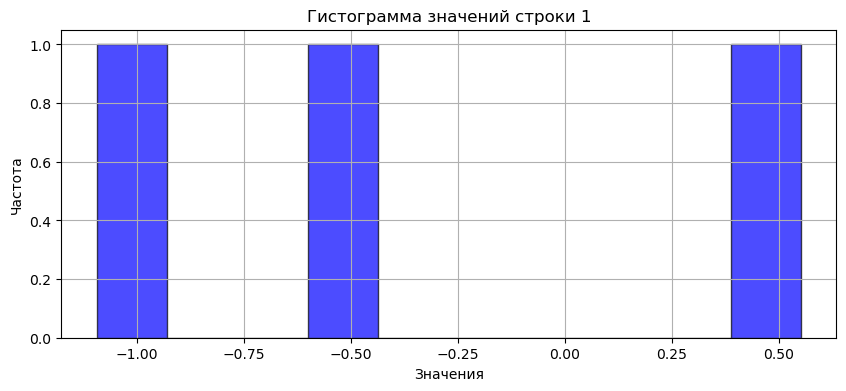

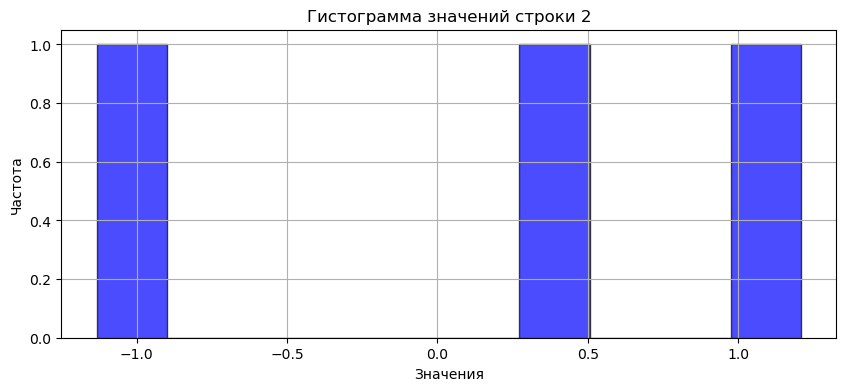

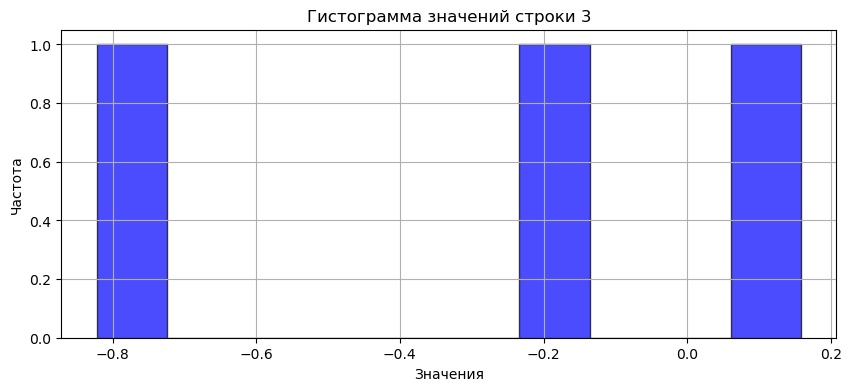

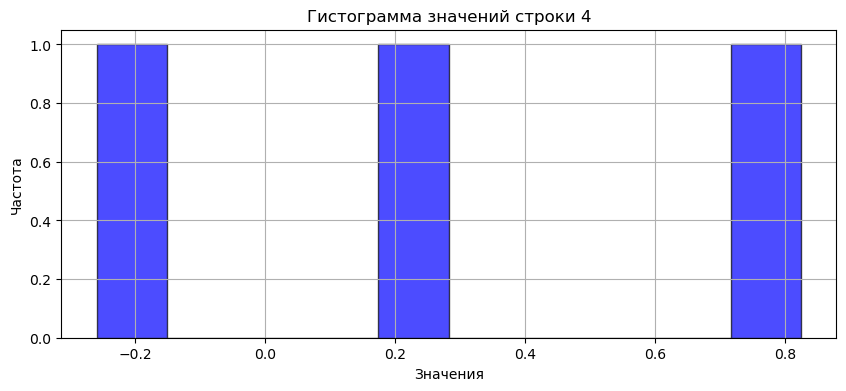

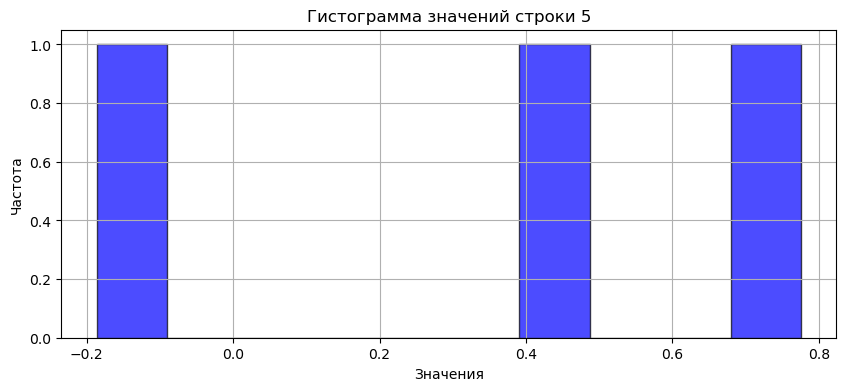

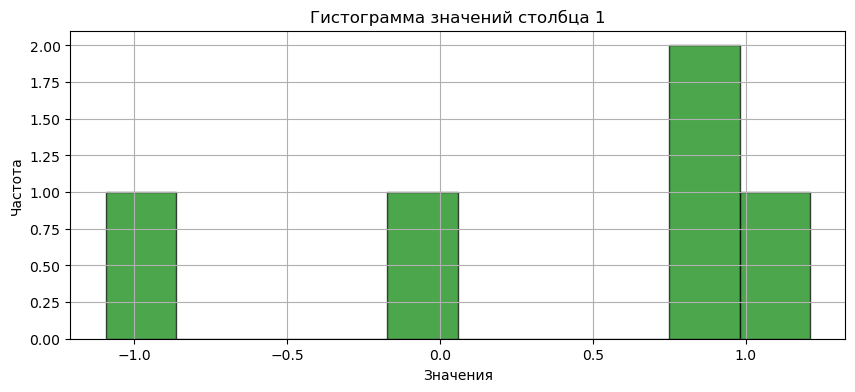

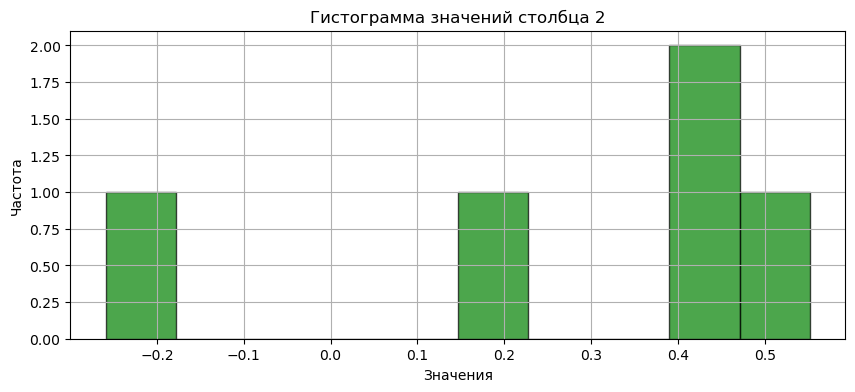

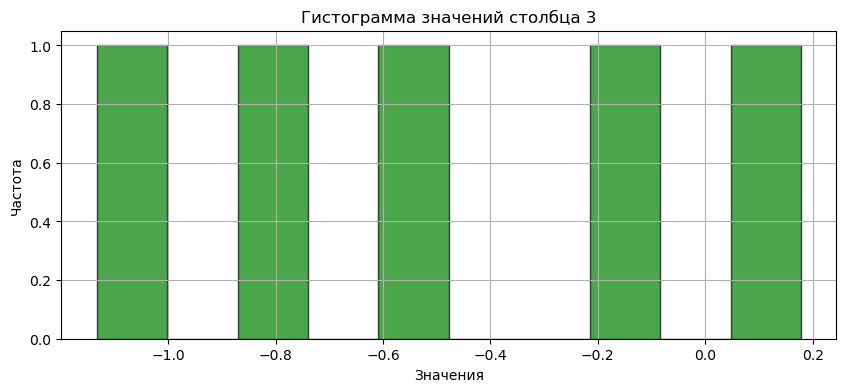

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix_and_analyze(rows, cols):
    # Заполнение матрицы случайными числами, распределенными по нормальному закону
    matrix = np.random.normal(loc=0, scale=1, size=(rows, cols))
    
    # Вычисление мат. ожидания и дисперсии для каждой строки и столбца
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    # Печать результатов
    print("Мат. ожидание по строкам:", row_means)
    print("Дисперсия по строкам:", row_variances)
    print("Мат. ожидание по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_variances)
    
    # Построение гистограмм для каждой строки
    for i in range(rows):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма значений строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()
    
    # Построение гистограмм для каждого столбца
    for j in range(cols):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма значений столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

# Пример использования
fill_matrix_and_analyze(5, 3)  # Создаем матрицу 5x3


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
def chess(m, n, a, b):
    # Создаем пустую матрицу
    matrix = [[0] * n for _ in range(m)]
    
    # Заполняем матрицу в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
                
    return matrix

# Тесты для функции chess
def test_chess():
    # Тест 1: Простой случай 2x2
    result = chess(2, 2, 1, 0)
    expected = [[1, 0], [0, 1]]
    assert result == expected, f"Test 1 failed: {result} != {expected}"
    
    # Тест 2: Простой случай 3x3
    result = chess(3, 3, 'X', 'O')
    expected = [['X', 'O', 'X'], ['O', 'X', 'O'], ['X', 'O', 'X']]
    assert result == expected, f"Test 2 failed: {result} != {expected}"
    
    # Тест 3: Простой случай 4x4
    result = chess(4, 4, 2, 3)
    expected = [[2, 3, 2, 3], [3, 2, 3, 2], [2, 3, 2, 3], [3, 2, 3, 2]]
    assert result == expected, f"Test 3 failed: {result} != {expected}"
    
    # Тест 4: Простой случай 1x5
    result = chess(1, 5, 'A', 'B')
    expected = [['A', 'B', 'A', 'B', 'A']]
    assert result == expected, f"Test 4 failed: {result} != {expected}"
    
    # Тест 5: Простой случай 5x1
    result = chess(5, 1, True, False)
    expected = [[True], [False], [True], [False], [True]]
    assert result == expected, f"Test 5 failed: {result} != {expected}"

    print("Все тесты пройдены!")

# Запуск тестов
test_chess()


Все тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

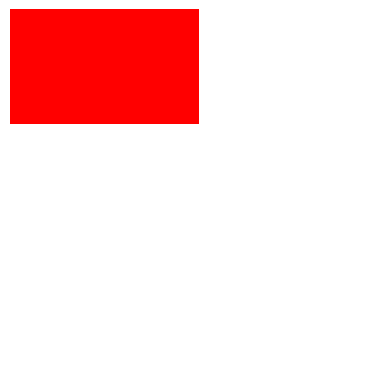

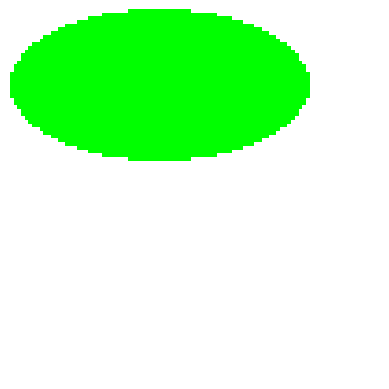

In [14]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем новое изображение с заданным фоном
    image = Image.new("RGB", (n, m), background_color)
    draw = ImageDraw.Draw(image)
    
    # Рисуем прямоугольник
    draw.rectangle([0, 0, a, b], fill=rectangle_color)
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем новое изображение с заданным фоном
    image = Image.new("RGB", (n, m), background_color)
    draw = ImageDraw.Draw(image)
    
    # Рисуем овал
    draw.ellipse([0, 0, a * 2, b * 2], fill=ellipse_color)
    
    return image

def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Убираем оси
    plt.show()

# Тесты для функций
def test_shapes():
    # Тест 1: Прямоугольник 50x30 на изображении 100x100
    rect_image = draw_rectangle(50, 30, 100, 100, (255, 0, 0), (255, 255, 255))
    display_image(rect_image)
    
    # Тест 2: Овал с полуосями 40 и 20 на изображении 100x100
    ellipse_image = draw_ellipse(40, 20, 100, 100, (0, 255, 0), (255, 255, 255))
    display_image(ellipse_image)

# Запуск тестов
test_shapes()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [15]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Пример временного ряда
time_series = np.array([1, 3, 7, 1, 2, 6, 0, 4, 5, 3, 8])

# 1. Математическое ожидание
mean = np.mean(time_series)

# 2. Дисперсия
variance = np.var(time_series)

# 3. Стандартное отклонение (СКО)
std_dev = np.std(time_series)

# 4. Поиск локальных максимумов и минимумов
local_maxima_indices, _ = find_peaks(time_series)
local_minima_indices = find_peaks(-time_series)[0]

local_maxima = time_series[local_maxima_indices]
local_minima = time_series[local_minima_indices]

# 5. Вычисление скользящего среднего
def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size).mean().to_numpy()

# Размер окна для скользящего среднего
p = 3
moving_avg = moving_average(time_series, p)

# Вывод результатов
print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Локальные максимумы: {local_maxima} (Индексы: {local_maxima_indices})")
print(f"Локальные минимумы: {local_minima} (Индексы: {local_minima_indices})")
print(f"Скользящее среднее (окно {p}): {moving_avg}")


Математическое ожидание: 3.6363636363636362
Дисперсия: 6.231404958677686
Стандартное отклонение: 2.4962782214083603
Локальные максимумы: [7 6 5] (Индексы: [2 5 8])
Локальные минимумы: [1 0 3] (Индексы: [3 6 9])
Скользящее среднее (окно 3): [       nan        nan 3.66666667 3.66666667 3.33333333 3.
 2.66666667 3.33333333 3.         4.         5.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [16]:
import numpy as np

def one_hot_encoding(labels):
    # Находим максимальное значение в метках, чтобы определить количество классов
    num_classes = np.max(labels) + 1  # +1, так как классы начинаются с 0
    # Создаем матрицу нулей размером (количество меток, количество классов)
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    # Заполняем единицами соответствующие позиции
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

# Пример использования
labels = np.array([0, 2, 3, 0])
one_hot_encoded = one_hot_encoding(labels)

print(one_hot_encoded)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
